In [112]:
from os.path import dirname, join as pjoin
import scipy.io as sio
from sklearn.feature_extraction import DictVectorizer
import numpy as np 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_digits
from sklearn.decomposition import FastICA
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from scipy import  stats
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from scipy.sparse import coo_matrix
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from scipy.ndimage import gaussian_filter
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [57]:
data1 = sio.loadmat("C:\\Users\\pc\\Desktop\\Supplementary Project-20220703\\S2T2B1.mat")
data2 = sio.loadmat("C:\\Users\\pc\\Desktop\\Supplementary Project-20220703\\S2T2B2.mat")

In [58]:
x1 = np.array(data1['a'])
x2 = np.array(data2['a'])
y = np.concatenate((np.zeros(45), np.ones(45)))

In [59]:
number_of_time_unit = 3500
number_of_electrods = 126 

In [60]:
time1 = []
time2 = []

for i1 in range(number_of_time_unit):
    col = []
    for i2 in range(len(x1)):
        col.append(x1[i2, :, i1])
    time1.append(col) 
time1 = np.array(time1)

for i1 in range(number_of_time_unit):
    col = []
    for i2 in range(len(x2)):
        col.append(x2[i2, :, i1])
    time2.append(col) 
time2 = np.array(time2)

In [61]:
def noramlizer(time):
    for t in range(len(time)):
        scaler = preprocessing.StandardScaler().fit(time[t])
        time[t] = scaler.transform(time[t])


In [62]:
noramlizer(time1)
noramlizer(time2)

In [63]:
total = []
for i in range(len(time1)):
    col = np.concatenate((time1[i], time2[i]))
    total.append(col)
total = np.array(total)


In [64]:
for i in range(len(total)):
    X = total[i]
    X_sparse = coo_matrix(X)
    X, X_sparse, y = shuffle(X, X_sparse, y, random_state=0)
    total[i] = X

In [65]:
def pca(X):
    pca = PCA(n_components=2).fit(X)
    return pca.fit_transform(X)

In [78]:
def logistic_regression(X_train, X_test, y_train, y_test):
    clf = LogisticRegression().fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    counter = 0
    for i in range(len(y_predict)):
        if y_predict[i] == y_test[i]:
            counter += 1
    return 1-(counter/i)

In [90]:
def svm(X_train, X_test, y_train, y_test):
    clf = make_pipeline(StandardScaler(), SVC(gamma='auto')).fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    counter = 0
    for i in range(len(y_predict)):
        if y_predict[i] == y_test[i]:
            counter += 1
    return 1-(counter/i)


In [69]:
def knn(X_train, X_test, y_train, y_test):
    clf = KNeighborsClassifier(n_neighbors=3).fit(X, y)
    y_predict = clf.predict(X_test)
    counter = 0
    for i in range(len(y_predict)):
        if y_predict[i] == y_test[i]:
            counter += 1
    return 1-(counter/i)

In [88]:
def final_result(classifier):
    metric = []
    if classifier == 'svm':
        for X in total:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)   
            metric.append(svm(X_train, X_test, y_train, y_test))
    
    elif classifier == 'knn':
        for X in total:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)   
            metric.append(knn(X_train, X_test, y_train, y_test))

    elif classifier == 'lgr':
        for X in total:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)   
            metric.append(logistic_regression(X_train, X_test, y_train, y_test))
    
    return metric

In [97]:
def plot_final(classifier):
    acc = final_result(classifier)
    acc_filtered = gaussian_filter(acc, sigma=10)
    plt.figure(figsize=(15, 6))
    plt.xlabel('time unit')
    plt.ylabel('accuracy')
    plt.plot(acc)
    plt.plot(acc_filtered)

In [110]:
def cv(classifier, X, y):
    if classifier == 'svm':
        clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
        scores = cross_val_score(clf, X, y, cv=5)
        return scores

    elif classifier == 'knn':
        clf = KNeighborsClassifier(n_neighbors=3)
        scores = cross_val_score(clf, X, y, cv=5)
        return scores

    elif classifier == 'lgr':
        clf = LogisticRegression()
        scores = cross_val_score(clf, X, y, cv=5)
        return scores


In [108]:
def classify_cross_validation(classifier):
    acc = []
    for X in total:
        acc.append(cv(classifier, X, y))
    acc_filtered = gaussian_filter(acc, sigma=10)
    plt.figure(figsize=(15, 6))
    plt.xlabel('time unit')
    plt.ylabel('accuracy')
    plt.plot(acc)
    plt.plot(acc_filtered)

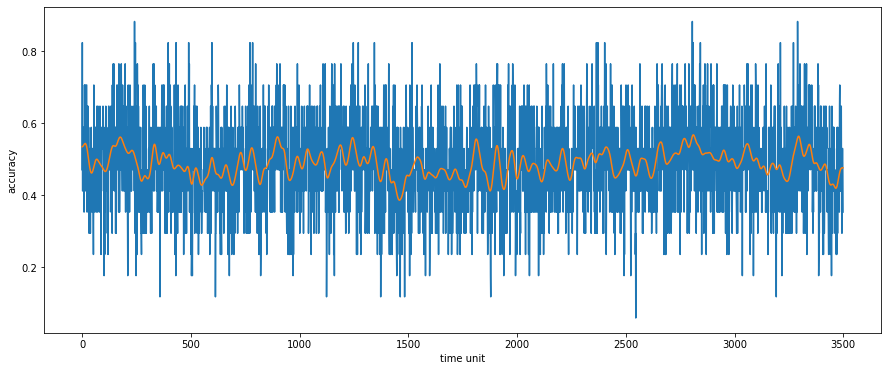

In [100]:
# without cross validation
plot_final('lgr')

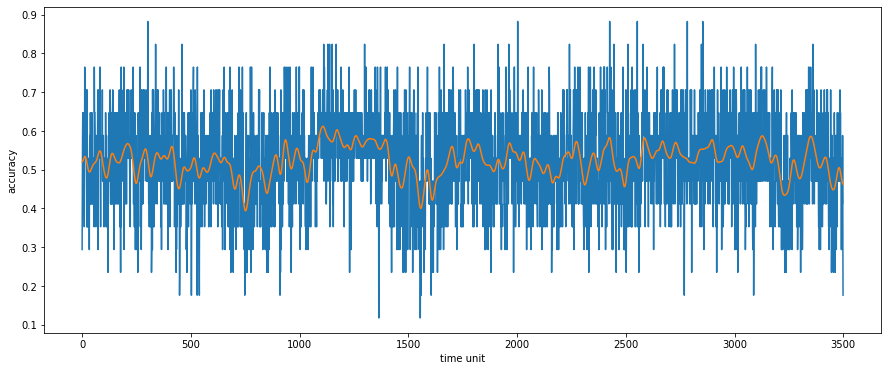

In [98]:
# without cross validation
plot_final('svm')

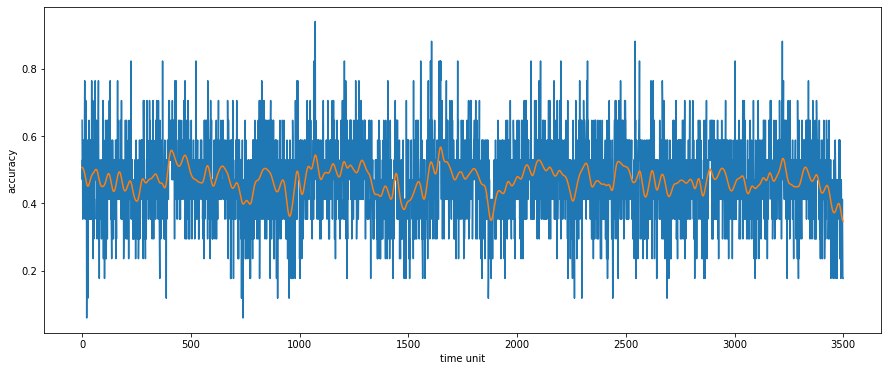

In [99]:
# without cross validation
plot_final('knn')

In [111]:
classify_cross_validation('svm')

NameError: name 'cross_val_score' is not defined